In [2]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [3]:
%matplotlib inline
rcParams['figure.figsize']=5, 4
sb.set_style('whitegrid')

In [4]:
data=pd.read_csv("C:/Sample - Superstore.csv", encoding= 'unicode_escape')

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [7]:
data.shape

(9994, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [11]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [13]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [14]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [15]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

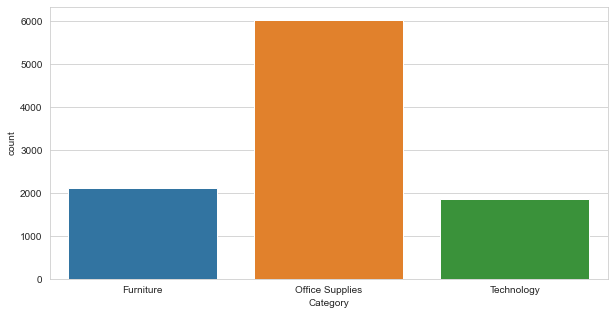

In [16]:
plt.figure(figsize=(10,5))
sb.countplot(x='Category',data=data)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

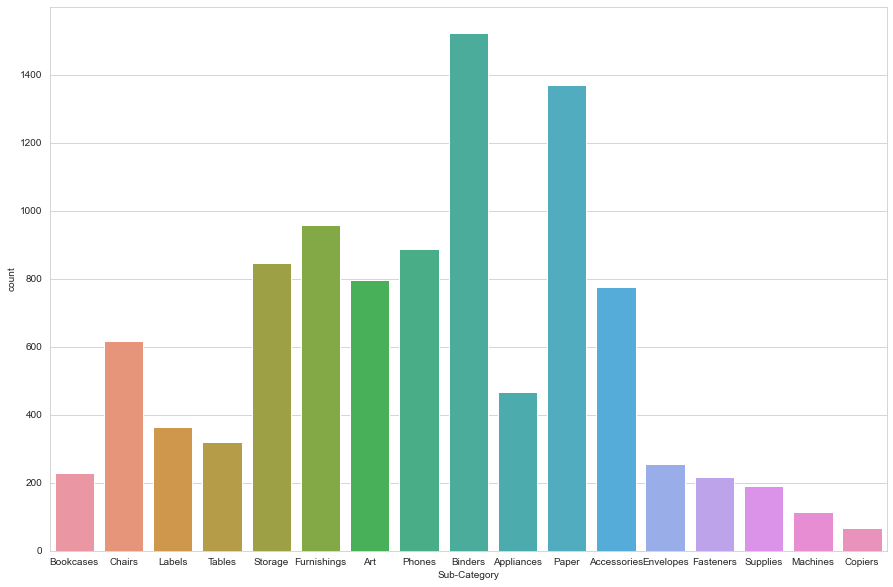

In [17]:
plt.figure(figsize=(15,10))
sb.countplot(x='Sub-Category',data=data)

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

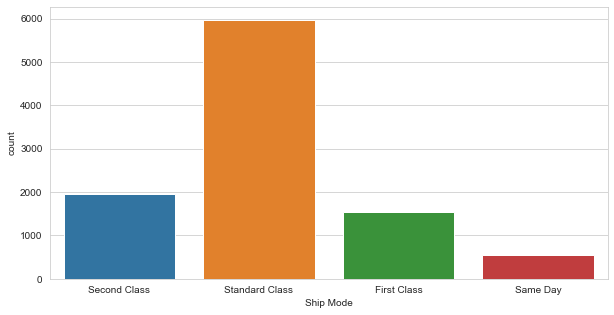

In [18]:
plt.figure(figsize=(10,5))
sb.countplot(x='Ship Mode',data=data)

<AxesSubplot:xlabel='Segment', ylabel='count'>

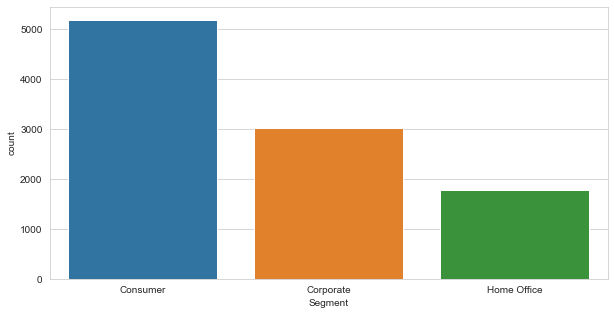

In [19]:
plt.figure(figsize=(10,5))
sb.countplot(x='Segment',data=data)

<AxesSubplot:xlabel='Region', ylabel='count'>

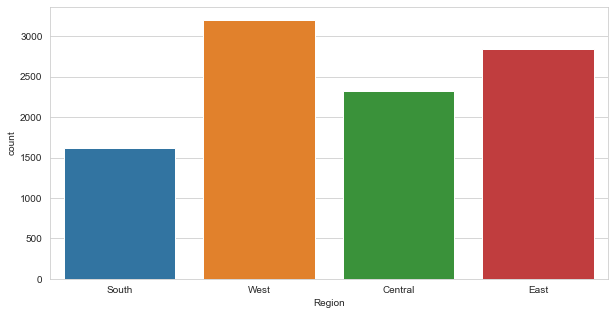

In [20]:
plt.figure(figsize=(10,5))
sb.countplot(x='Region',data=data)

Text(0.5, 1.0, 'Region vs Sales')

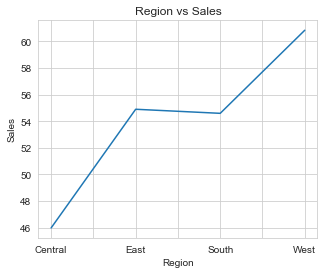

In [21]:
data.groupby('Region')['Sales'].median().plot()
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Region vs Sales')

Text(0.5, 1.0, 'Ship Mode vs Sales')

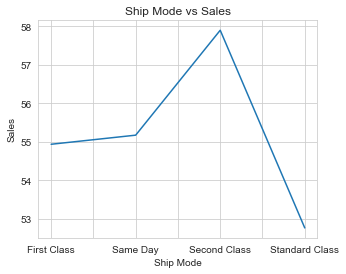

In [22]:
data.groupby('Ship Mode')['Sales'].median().plot()
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.title('Ship Mode vs Sales')

In [23]:
corelation=data.corr()

In [24]:
corelation

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

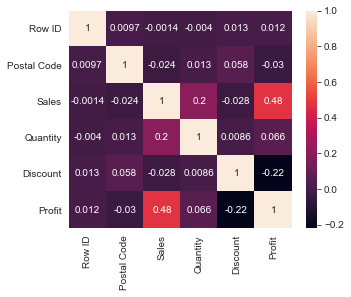

In [25]:
sb.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

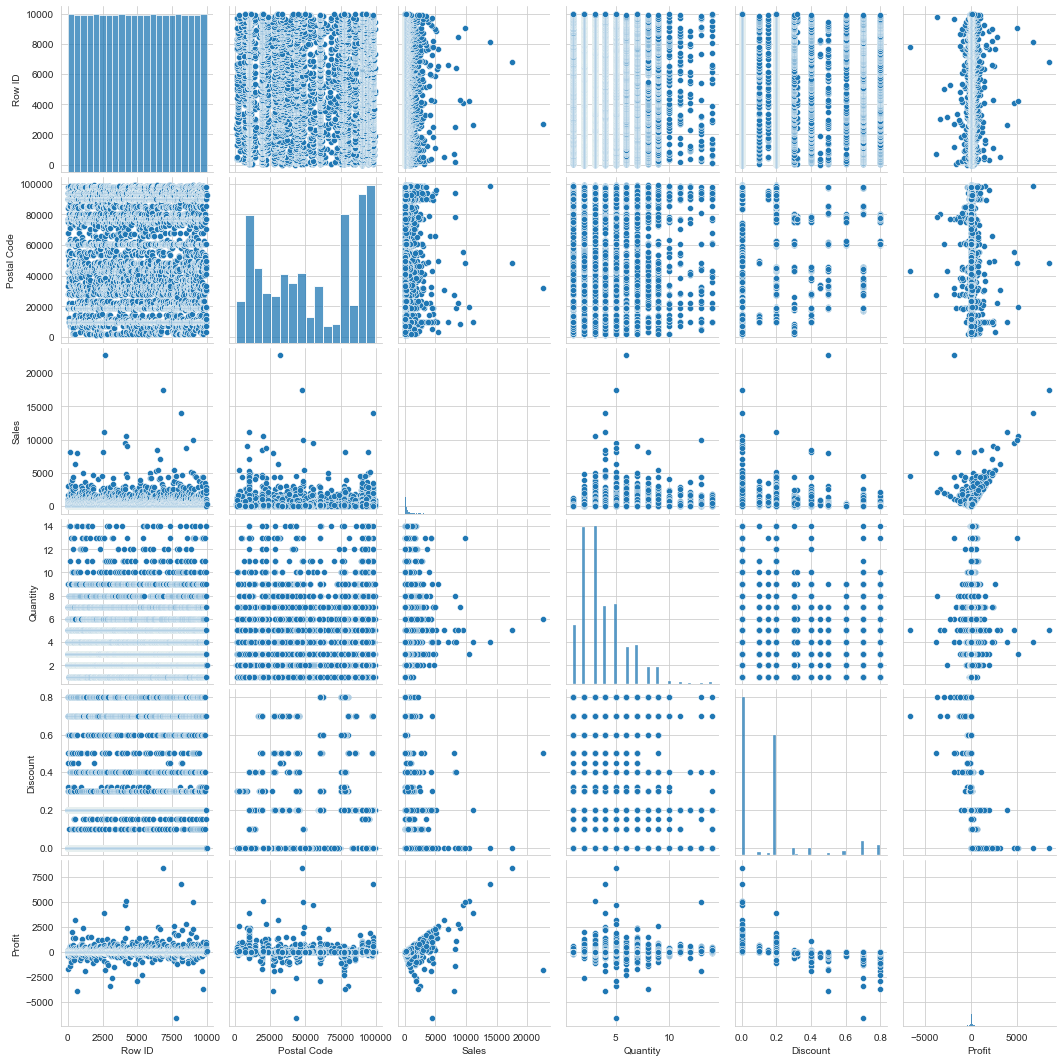

In [26]:
sb.pairplot(data)

In [27]:
# data_x=data.iloc[:,17:20].values
# data_y=data.iloc[:,20].values
# X=scale(data_x)
# y=data_y

In [28]:
X=pd.DataFrame({'Sales':data['Sales'],'Quantity':data['Quantity'],'Discount':data['Discount']})
y=np.array(data['Profit'])

In [29]:
X

,Sales,Quantity,Discount
0,261.9600,2,0.00
1,731.9400,3,0.00
2,14.6200,2,0.00
3,957.5775,5,0.45
4,22.3680,2,0.20
...,...,...,...
9989,25.2480,3,0.20
9990,91.9600,2,0.00
9991,258.5760,2,0.20
9992,29.6000,4,0.00


In [30]:
X.describe()

,Sales,Quantity,Discount
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203
std,623.245101,2.225110,0.206452
min,0.444000,1.000000,0.000000
25%,17.280000,2.000000,0.000000
50%,54.490000,3.000000,0.200000
75%,209.940000,5.000000,0.200000
max,22638.480000,14.000000,0.800000


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
regressor.intercept_

35.54205368134144

In [34]:
regressor.coef_

array([ 1.53722635e-01, -1.96576058e+00, -2.28105795e+02])

In [35]:
y_pred = regressor.predict(X_test)

In [36]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,11.6800,35.201493
1,9.7438,35.093887
2,2.6406,-6.632599
3,17.7450,23.737022
4,6.4428,-18.826271
...,...,...
1994,12.9900,39.597961
1995,2.5578,31.000606
1996,43.1904,45.442495
1997,5.7594,34.663464


In [37]:
from sklearn import metrics
print('R2 of Linear Regression:',round(metrics.r2_score(y_test,y_pred),2))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

R2 of Linear Regression: 0.34
Mean Absolute Error: 61.84
Mean Squared Error: 57052.27
Root Mean Squared Error: 238.86


In [38]:
a=regressor.predict(np.array([1000,2,0.3]).reshape(1, -1))
a

array([116.901429])